# Trabajo Práctico Individual

|    |    |
| -- | -- |
| **Universidad** | Universidad Nacional del Oeste       |
| **Carrera**     | Esp. en Ciencia de Datos             |
| **Materia**     | Fundamentos de Estadísticas (01050)  |
| **Profesor**    | Mg. Sc. Silvia N. Pérez              |
| **Alumno**      | Mg. Ing. Pablo Pandolfo              |
| **Fecha**       | Mayo 2025                            |
|                 |                                      |

## PARTE 1

Los datos del archivo centrales.xls corresponden a datos recopilados de dos centrales eléctricas de ciclo combinado correspondiendo a variables ambientales promedio por hora para predecir la producción neta de energía eléctrica (EE) por hora de la planta.

| Nombre en el dataset | Renombrar las variables como | Descripción y valores posibles                |
| --                   | --                           | --                                            |
| X1                   | temp                         | Temperatura                                   |
| X2                   | vacio                        | Vacío de escape                               |
| X3                   | presion                      | Presión atmosférica (900-1200)                |
| X4                   | humedad                      | Humedad relativa ambiente                     |
| X5                   | eep                          | Energía eléctrica producida                   |
| X6                   | planta                       | Planta eléctrica a la que corresponde el dato |

In [4]:
# Cargo librerias a usar
library(readxl)
library(tidyverse)
library(dplyr)
library(tidyr)

In [5]:
# Borro ambiente de trabajo
rm(list=ls())

In [6]:
# Seteo directorio de trabajo
setwd("/Users/ppando/Materias/data/materias/estadistica/tps")

In [7]:
# Cargo datos del archivo centrales.xlsx
datos <- read_xlsx("centrales.xlsx")

In [8]:
# Renombro variables
colnames(datos) <- c("temp", "vacio", "presion", "humedad", "eep", "planta")

In [9]:
# Muestro estructura de los datos
str(datos)
# cuali = {planta}
# cuanti = {temp, vacio, presion, humedad, eep}

tibble [961 × 6] (S3: tbl_df/tbl/data.frame)
 $ temp   : num [1:961] 13.25 3.98 6.49 14.87 11.2 ...
 $ vacio  : num [1:961] 34 35.5 35.6 35.7 35.8 ...
 $ presion: num [1:961] 1019 1017 1025 1016 1019 ...
 $ humedad: num [1:961] 72.1 86.5 79.7 57.7 64.6 ...
 $ eep    : num [1:961] 470 490 487 469 473 ...
 $ planta : num [1:961] 2 2 2 2 2 2 2 2 2 2 ...


Nos indica cuántas observaciones (filas) y variables (columnas) tiene el data frame y el nombre, tipo y varios valores de cada variable

In [12]:
# Convierto a los datos planta como factor
datos$planta <- as.factor(datos$planta)

In [13]:
# Muestro resumen
summary(datos)

      temp           vacio          presion          humedad      
 Min.   : 3.00   Min.   :34.03   Min.   : 995.2   Min.   : 34.90  
 1st Qu.:13.65   1st Qu.:41.58   1st Qu.:1008.9   1st Qu.: 63.43  
 Median :20.40   Median :51.19   Median :1012.8   Median : 75.51  
 Mean   :19.63   Mean   :54.22   Mean   :1013.0   Mean   : 73.74  
 3rd Qu.:25.67   3rd Qu.:67.07   3rd Qu.:1017.2   3rd Qu.: 85.56  
 Max.   :34.53   Max.   :79.74   Max.   :1031.5   Max.   :100.09  
      eep        planta 
 Min.   :425.6   1:450  
 1st Qu.:439.6   2:511  
 Median :451.0          
 Mean   :454.3          
 3rd Qu.:469.0          
 Max.   :491.2          

* La temperatura tiene un rango de valores entre 3 y 34.53, 
con una mediana de 20.4 cercana al promedio de 19.63
* El vacío de escape tiene un rango de valores entre 34.03 y 79.74, 
con una mediana de 51.19 cercana al promedio de 54.22
* La presión atmosférica tiene una rango de valores entre 995.2 y 1031.5 
con una mediana de 1012.8 cercana al promedio 1013.0
* La humedad relativa ambiente tiene un rango de valores entre 34.90 y 100.09, 
con una mediana de 75.51 cercana al promedio de 73.74
* La energía eléctrica producida tiene un rango de valores entre 425.6 y 491.2, 
con una mediana de 451.0 cercana al promedio de 454.3

In [14]:
# Filtro planta 1 y muestro resumen
planta1 <-  datos %>% filter(datos$planta == 1)
summary(planta1)

      temp           vacio          presion          humedad     
 Min.   : 5.37   Min.   :36.30   Min.   : 999.4   Min.   :34.90  
 1st Qu.:20.49   1st Qu.:58.79   1st Qu.:1008.4   1st Qu.:60.54  
 Median :24.48   Median :66.34   Median :1011.5   Median :71.84  
 Mean   :23.49   Mean   :62.80   Mean   :1012.0   Mean   :70.95  
 3rd Qu.:27.94   3rd Qu.:70.32   3rd Qu.:1015.1   3rd Qu.:82.68  
 Max.   :34.53   Max.   :79.74   Max.   :1030.3   Max.   :98.55  
      eep        planta 
 Min.   :425.6   1:450  
 1st Qu.:435.0   2:  0  
 Median :441.4          
 Mean   :445.0          
 3rd Qu.:450.6          
 Max.   :487.1          

In [15]:
# Filtro planta 2 y muestro resumen
planta2 <-  datos %>% filter(datos$planta == 2)
summary(planta2)

      temp           vacio          presion          humedad      
 Min.   : 3.00   Min.   :34.03   Min.   : 995.2   Min.   : 35.40  
 1st Qu.:11.22   1st Qu.:40.77   1st Qu.:1009.3   1st Qu.: 66.73  
 Median :15.27   Median :43.67   Median :1013.9   Median : 78.52  
 Mean   :16.22   Mean   :46.67   Mean   :1014.0   Mean   : 76.20  
 3rd Qu.:20.90   3rd Qu.:49.39   3rd Qu.:1018.5   3rd Qu.: 86.78  
 Max.   :33.40   Max.   :77.95   Max.   :1031.5   Max.   :100.09  
      eep        planta 
 Min.   :428.3   1:  0  
 1st Qu.:450.0   2:511  
 Median :464.1          
 Mean   :462.6          
 3rd Qu.:474.5          
 Max.   :491.2          

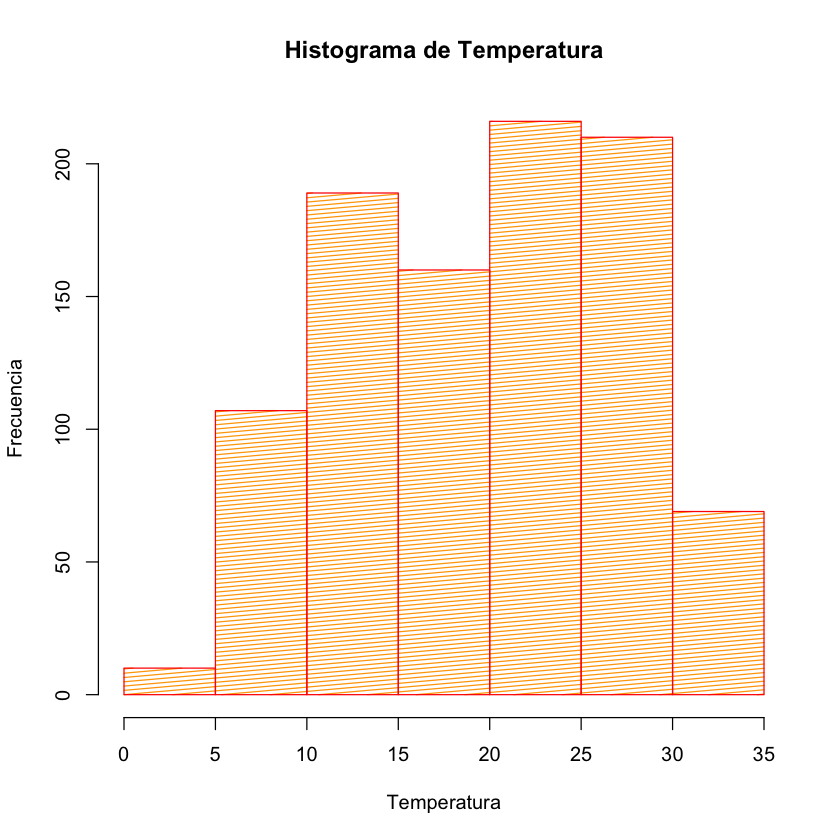

In [16]:
# Muestro histograma y datos del histograma
histo <- hist(datos$temp, 
              main = "Histograma de Temperatura",
              xlab = "Temperatura",
              ylab = "Frecuencia",
              col = "orange",
              density = 30,
              angle = 5,
              border = "red")

Se observa que los datos se ajustan a una distibución normal, dada la simetría que presenta
La forma de campana nos dice que la frecuencia de valores de temperatura disminuye a medida 
que nos alejamos del pico

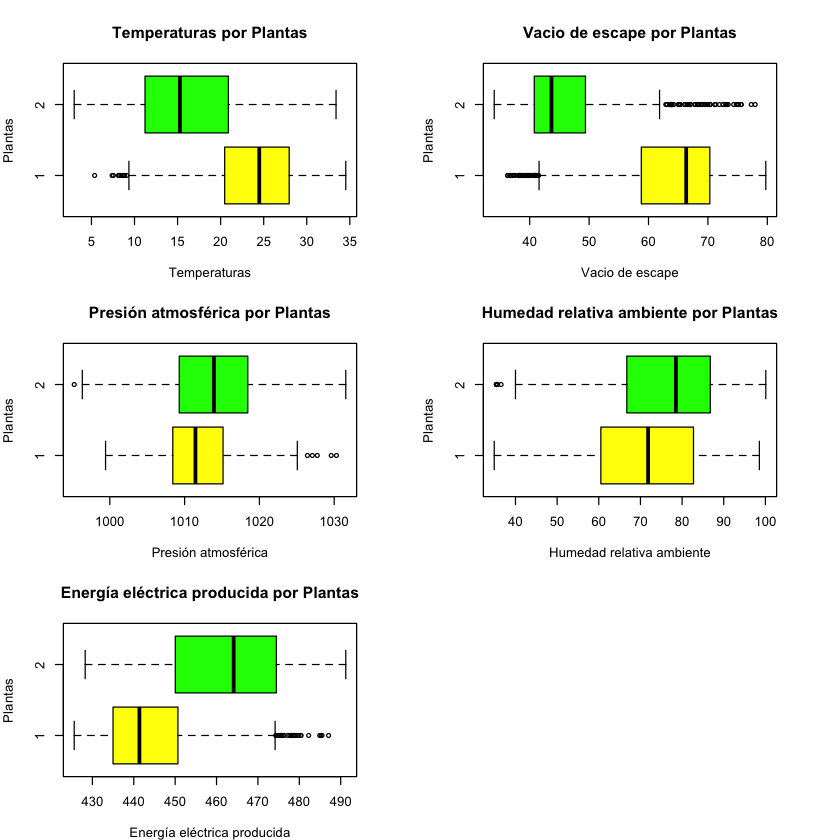

In [17]:
 # Muestro boxplots para planta 1 y planta 2
par(mar=c(4,4,4,4))
par(mfrow = c(3, 2))
boxplot(datos$temp ~ datos$planta,
        horizontal = TRUE,
        main = "Temperaturas por Plantas",
        xlab = "Temperaturas",
        ylab = "Plantas",
        col = c("yellow", "green"))
boxplot(datos$vacio ~ datos$planta,
        horizontal = TRUE,
        main = "Vacio de escape por Plantas",
        xlab = "Vacio de escape",
        ylab = "Plantas",
        col = c("yellow", "green"))
boxplot(datos$presion ~ datos$planta,
        horizontal = TRUE,
        main = "Presión atmosférica por Plantas",
        xlab = "Presión atmosférica",
        ylab = "Plantas",
        col = c("yellow", "green"))
boxplot(datos$humedad ~ datos$planta,
        horizontal = TRUE,
        main = "Humedad relativa ambiente por Plantas",
        xlab = "Humedad relativa ambiente",
        ylab = "Plantas",
        col = c("yellow", "green"))
boxplot(datos$eep ~ datos$planta,
        horizontal = TRUE,
        main = "Energía eléctrica producida por Plantas",
        xlab = "Energía eléctrica producida",
        ylab = "Plantas",
        col = c("yellow", "green"))

* Se observan diferencias en la distribución de datos entre la planta eléctrica 1 y la planta eléctrica 2
* Las medianas son diferentes en todas las variables, por lo tanto, **hay una variación en la tendencia central de los datos**, sobre todo en las variables: Vacio de escape y Energía eléctrica producida
* El rango intercuartílico de la energía eléctrica producida por la planta 2 es más grande que el de la planta 1, esto significa, que los **datos están más dispersos en la planta 2 respecto de la planta 1 que tiene menos variabilidad**
* La variable vacio de escape en la planta eléctrica 2 presenta muchos valores atípicos, indicando una **distribución irregular**
* También se observa en el gráfico "Vacio de escape por Plantas", que la mediana no está centrada en ambas cajas, pudiendo haber un **sesgo en la distribución** (falta de simetría en los datos)

## PARTE 2

El tiempo de incapacidad por enfermedad de los empleados de una compañía en un mes tiene una distribución normal con media de 100 horas y varianza de 400

In [19]:
# Datos
𝜇 <- 100          # media
𝜎 <- sqrt(400)    # desviación estándar

1. ¿Cuál es la probabilidad de que el tiempo de incapacidad en un mes dado sea de 130 o más horas?

In [21]:
X <- 130      # valor

# X ~ N(𝜇,𝜎^2)
# P (X ≥ 130) = ?
p <- 1 - pnorm(X, 𝜇, 𝜎)
p

# Z ~ N(0, 1)
Z <- (X - 𝜇) / 𝜎 # cuantas desviaciones estándar se aleja X de la media
#P(Z ≥ 1.5)
p <- 1 - pnorm(Z)
p

[1] 0.0668072

[1] 0.0668072

2. ¿Cuál es la probabilidad de que el tiempo de incapacidad se encuentre entre 90 y 120 horas?

In [22]:
X1 = 90
X2 = 120

# X ~ N(𝜇,𝜎^2)
# P (90 ≤ X ≤ 120) = ?
p <- pnorm(X2, 𝜇, 𝜎) - pnorm(X1, 𝜇, 𝜎)
p

# Z ~ N(0, 1)
Z1 <- (X1 - 𝜇) / 𝜎
Z2 <- (X2 - 𝜇) / 𝜎
# P(-0.5 ≤ Z ≤ 1)
p = pnorm(Z2) - pnorm(Z1)
p

[1] 0.5328072

[1] 0.5328072

3. ¿Cuál tiempo de incapacidad deberá planearse para que la probabilidad de excederlo sea solo en 5% de las ocasiones?

In [24]:
# P (X ≥ x) = 0.05: x = ?
x <- qnorm(0.95, 𝜇, 𝜎)
x

[1] 132.8971